<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 87.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 81.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 85.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 113.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.3 MB/s eta 0:00:00


##### Import Necessary Modules:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [4]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [5]:
## Write your code here
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [6]:
## Write your code here
columns_with_missing_values = df.isnull().sum().sort_values(ascending=False)
columns_with_missing_values = columns_with_missing_values[columns_with_missing_values > 40000].index

# Step 2: Filter the DataFrame to include only these columns
df_missing_values = df[columns_with_missing_values]

# Step 3: Ensure df_missing_values is a valid DataFrame
print(df_missing_values.shape)
# Print the column names with missing values
print(columns_with_missing_values)

(65437, 10)
Index(['AINextMuch less integrated', 'AINextLess integrated',
       'AINextNo change', 'AINextMuch more integrated', 'EmbeddedAdmired',
       'EmbeddedWantToWorkWith', 'EmbeddedHaveWorkedWith',
       'ConvertedCompYearly', 'AIToolNot interested in Using',
       'AINextMore integrated'],
      dtype='object')


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



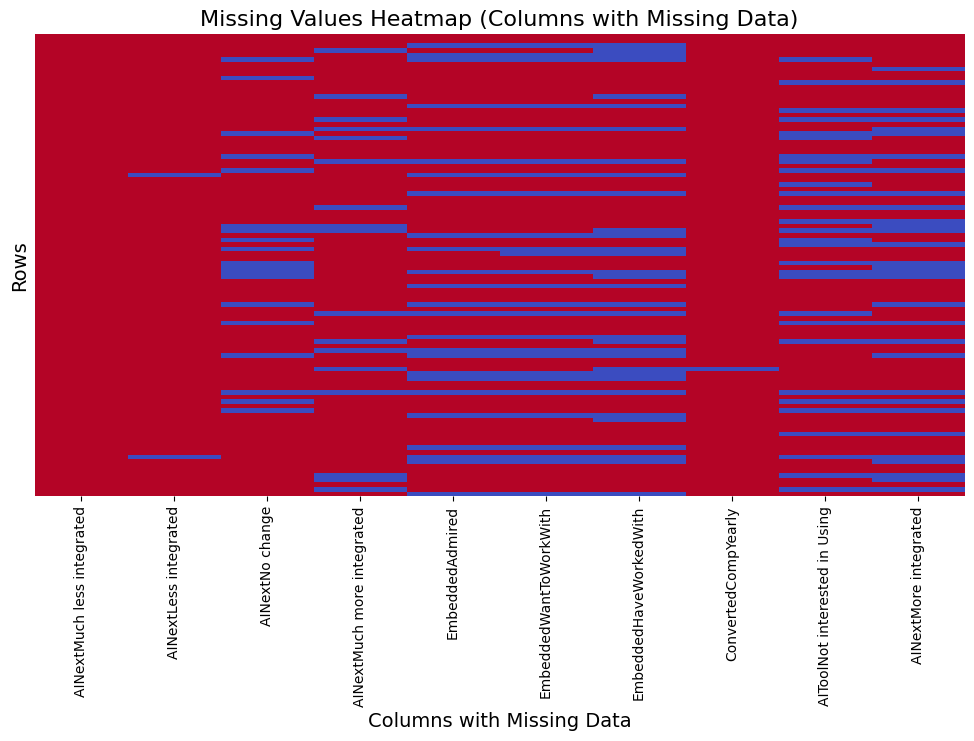

In [7]:
## Write your code here
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.heatmap(df_missing_values.head(100).isnull(), cmap='coolwarm', cbar=False, annot=False, 
            xticklabels=df_missing_values.columns, yticklabels=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, fontsize=10)  # Rotate column names to make them fit

# Add title and axis labels
plt.title('Missing Values Heatmap (Columns with Missing Data)', fontsize=16)
plt.xlabel('Columns with Missing Data', fontsize=14)
plt.ylabel('Rows', fontsize=14)

# Show the plot
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [8]:
## Write your code here
mv_count=(df.isnull().sum().sort_values(ascending=False).index)
df[mv_count]

,AINextMuch less integrated,AINextLess integrated,AINextNo change,AINextMuch more integrated,EmbeddedAdmired,EmbeddedWantToWorkWith,EmbeddedHaveWorkedWith,ConvertedCompYearly,AIToolNot interested in Using,AINextMore integrated,...,YearsCode,NEWSOSites,LearnCode,EdLevel,AISelect,MainBranch,Age,Employment,Check,ResponseId
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,I have never visited Stack Overflow or the Sta...,Books / Physical media,Primary/elementary school,Yes,I am a developer by profession,Under 18 years old,"Employed, full-time",Apples,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20,Stack Overflow for Teams (private knowledge sh...,Books / Physical media;Colleague;On the job tr...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","No, and I don't plan to",I am a developer by profession,35-44 years old,"Employed, full-time",Apples,2
2,NaN,NaN,NaN,NaN,Rasberry Pi,Rasberry Pi,Rasberry Pi,NaN,NaN,NaN,...,37,Stack Overflow;Stack Exchange;Stack Overflow B...,Books / Physical media;Colleague;On the job tr...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","No, and I don't plan to",I am a developer by profession,45-54 years old,"Employed, full-time",Apples,3
3,NaN,NaN,NaN,Learning about a codebase;Project planning;Wri...,NaN,NaN,Rasberry Pi,NaN,NaN,NaN,...,4,Stack Overflow,"Other online resources (e.g., videos, blogs, f...",Some college/university study without earning ...,Yes,I am learning to code,18-24 years old,"Student, full-time",Apples,4
4,NaN,NaN,NaN,NaN,CMake;Rasberry Pi,CMake;Rasberry Pi,CMake;Cargo;Rasberry Pi,NaN,NaN,NaN,...,9,Stack Overflow for Teams (private knowledge sh...,"Other online resources (e.g., videos, blogs, f...","Secondary school (e.g. American high school, G...","No, and I don't plan to",I am a developer by profession,18-24 years old,"Student, full-time",Apples,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,NaN,NaN,NaN,Writing code;Search for answers;Generating con...,NaN,NaN,NaN,NaN,Committing and reviewing code,Learning about a codebase;Project planning;Doc...,...,5,NaN,"On the job training;School (i.e., University, ...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Yes,I am a developer by profession,18-24 years old,"Employed, full-time",Apples,65433
65433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Stack Overflow;Stack Exchange,NaN,NaN,NaN,I am a developer by profession,25-34 years old,"Employed, full-time",Apples,65434
65434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,NaN,"Other online resources (e.g., videos, blogs, f...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,I am a developer by profession,25-34 years old,"Employed, full-time",Apples,65435
65435,NaN,NaN,NaN,NaN,Cargo;GNU GCC;Rasberry Pi,Cargo;GNU GCC;Rasberry Pi,Arduino;CMake;Cargo;GNU GCC;Rasberry Pi,NaN,NaN,NaN,...,5,Stack Overflow;Stack Exchange,On the job training;Other online resources (e....,"Secondary school (e.g. American high school, G...","No, and I don't plan to",I am a developer by profession,18-24 years old,"Employed, full-time",Apples,65436


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [10]:
## Write your code here
most_frequent_employment = df['Employment'].mode()[0]
most_frequent_employment

'Employed, full-time'

##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [11]:
## Write your code here
df['Employment'].fillna(most_frequent_employment, inplace=True)

/tmp/ipykernel_438/3937732618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment'].fillna(most_frequent_employment, inplace=True)


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


/tmp/ipykernel_438/3335922892.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_employment.index, y=top_10_employment.values, palette='Set2')


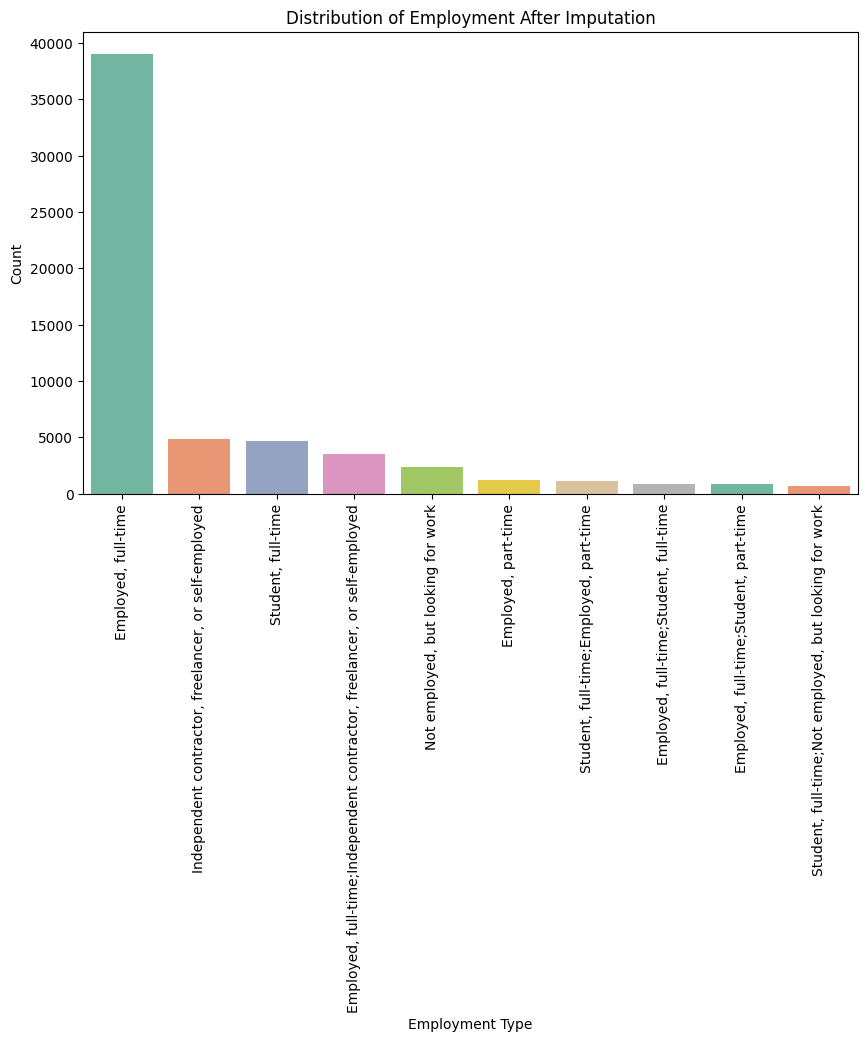

In [16]:
## Write your code here
top_10_employment = df['Employment'].value_counts(ascending=False).head(10)
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
sns.barplot(x=top_10_employment.index, y=top_10_employment.values, palette='Set2')

# Adding labels and title for better clarity
plt.title('Distribution of Employment After Imputation')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

# Show the plot
plt.show()

### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
